# **PMR3508 - Exercício Programa 02**: <br> **Redes Neurais e o Dataset MNIST**
---
---

## ✏️ **Cabeçalho**:

### **Nome**: `[Mateus Ono Nishikito]`
### **NUSP**: `[14597750]`
### **Hash**: `[34]`

---

## 📜 **Descrição:**

Neste exercício, você irá trabalhar com o **dataset MNIST**, um conjunto de dados com 70.000 imagens de dígitos escritos à mão. Seu objetivo será aplicar os conceitos de **Redes Neurais Artificiais (ANNs)** vistos na aula teórica. Este EP está dividido em tarefas, sua formatação não deve ser alterada, mas novas células de código ou texto podem ser criadas nos blocos de cada tarefa.

---

## ⚠️ **Instruções:**
- Complete todas as tarefas abaixo, respondendo às perguntas e escrevendo o código necessário.
- Comente seu código para facilitar a correção.
- Entregue o notebook no formato `.ipynb`.

---



## ✅ **Tarefas:**

1. **Probabilidades de dígitos no *dataset***       ⇒ `2 pontos`
2. **Análise Exploratória de Dados (EDA)**          ⇒ `2 pontos`
3. **Treinamento e teste de Modelos**               ⇒ `2 pontos`
4. **Comunicação de Resultados e Visualizações**    ⇒ `2 pontos`
5. **Publicação no *Kaggle* e Documentação**        ⇒ `2 pontos`

---

<br>
<center>
        <h1>
        <b>
        BOA SORTE !!!
        </b>
        </h1>
</center>
<br>

---
---

## ⏳ Loading dos Dados

In [1]:
import pickle
import random
import numpy as np
import os
from os.path import join

# Configuração de seeds para replicabilidade
np.random.seed(42)  # Seed para NumPy
random.seed(42)     # Seed para o módulo random

input_path = os.getcwd()  # Obtém o diretório atual
images_filepath = join(input_path, 'MNIST-images.pkl')
labels_filepath = join(input_path, 'MNIST-labels.pkl')
validation_images_filepath = join(input_path, 'MNIST-validation-images.pkl')

with open(images_filepath, 'rb') as f:
    X_tot = pickle.load(f)

with open(labels_filepath, 'rb') as f:
    y_tot = pickle.load(f)

with open(validation_images_filepath, 'rb') as f:
    X_val = pickle.load(f)

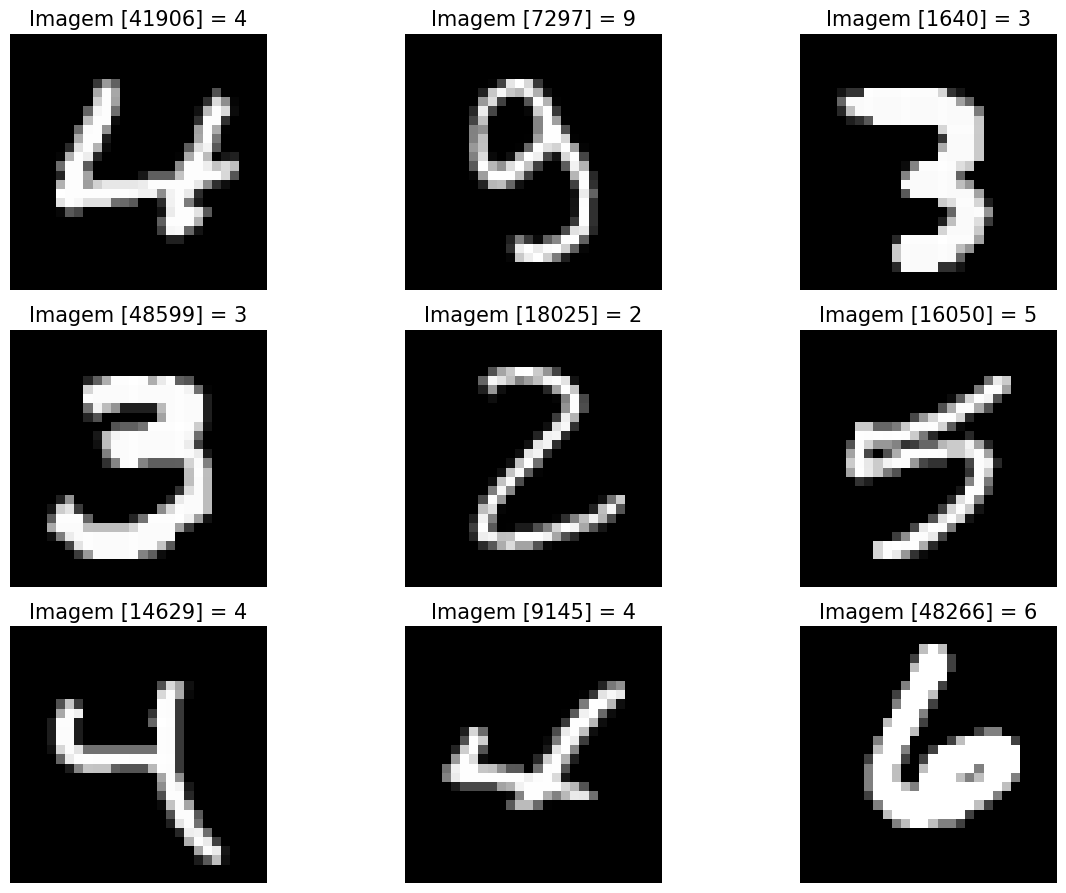

In [2]:
'''
TESTE DE CARREGAMENTO DO DATASET POR VISUALIZAÇÃO
Este bloco visualiza algumas imagens do dataset MNIST para verificar se o
carregamento foi realizado corretamente.
'''

%matplotlib inline
import random
import matplotlib.pyplot as plt

def show_images(images, title_texts):
    # Função para mostrar as imagens com seus respectivos títulos
    cols = 3  # Número de colunas na visualização
    rows = int(len(images) / cols) + 1  # Calcula o número de linhas
    plt.figure(figsize=(12, 12))  # Define o tamanho da figura
    index = 1
    for x in zip(images, title_texts):  # Itera sobre as imagens e títulos
        image = x[0]
        title_text = x[1]
        plt.subplot(rows, cols, index)  # Adiciona um subplot
        plt.axis('off')  # Desativa os eixos
        plt.imshow(image, cmap=plt.cm.gray)  # Mostra a imagem em escala de cinza
        if (title_text != ''):
            plt.title(title_text, fontsize=15)  # Define o título da imagem
        index += 1
    plt.tight_layout()  # Ajusta o layout para evitar sobreposição de títulos
    plt.show()  # Exibe a figura com as imagens e títulos

images_2_show = []  # Lista para armazenar as imagens a serem mostradas
titles_2_show = []  # Lista para armazenar os títulos das imagens
# Seleciona aleatoriamente 9 imagens de treino
for i in range(0, 9):
    r = random.randint(1, 60000)
    images_2_show.append(X_tot[r])  # Adiciona a imagem selecionada à lista
    titles_2_show.append(f"Imagem [{str(r)}] = {str(y_tot[r])}")  # Adiciona o título correspondente

show_images(images_2_show, titles_2_show)  # Exibe as imagens selecionadas

# 0️⃣ Suas bibliotecas

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle
from sklearn.model_selection import GridSearchCV




# 1️⃣ Tarefa 01: Probabilidades 🎲

## 🧑🏻‍💻 Item a)

Descubra o número do Dataset associado ao seu Hash.


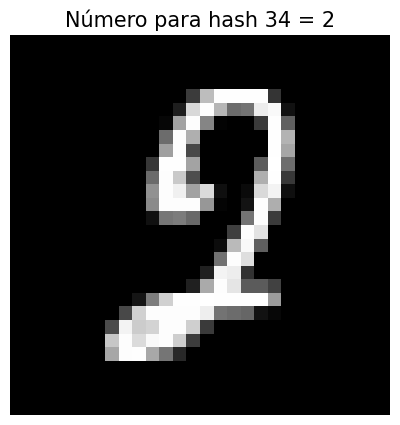

In [4]:
hash=34

imagem=X_tot[hash] # Seleciona a imagem com o índice hash
label=y_tot[hash] # Seleciona o rótulo com o índice hash

show_images([imagem], [f"Número para hash {str(hash)} = {str(label)}"])  # Exibe as imagens selecionadas

## 🔦 Item b)

Determine, para a imagem vinculada ao seu Hash, qual é a Probabilidade de um píxel claro (128 - 225) para esta única imagem?

In [5]:
numero=X_tot[hash] # Seleciona a imagem com o índice hash

qtd_pixel_claro=np.sum((numero>128)&(numero<225)) # Conta a quantidade de pixels claros

#Nesse caso, usei apenas "<" e não "<=" pois o intervalo dado é um intervalo aberto "(x,y)"



qtd_pixel_claro

33

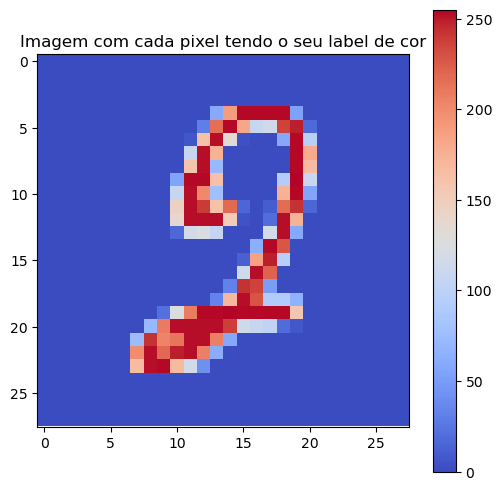

In [6]:
#Esse número me pareceu um pouco baixo quando comparado às dimensões da imagem (28x28=784 pixels)
#Vou verificar a distribuição de pixels da imagem para entender melhor o que está acontecendo



# Função para mostrar a imagem com cada pixel tendo o seu label de cor
def show_image_with_labels(image):
    plt.figure(figsize=(6, 6))
    plt.imshow(image, cmap='coolwarm')
    plt.colorbar()
    plt.title("Imagem com cada pixel tendo o seu label de cor")
    plt.show()

# Exibir a imagem vinculada ao hash
show_image_with_labels(imagem)

In [7]:
# Aqui eu percebo que o intervalo fornecido (128,225) não engloba os pixels mais claros (acima de 225)
# Vou considerar os pixels acima de 225 como claros também. Acredito que posso considerar os pixels brancos como pixel claro também

#calculando o pixel mais claro
pixel_mais_claro=np.max(numero)

#Recalculando a quantidade de pixels claros
qtd_pixel_claro=np.sum((numero>128)&(numero<=pixel_mais_claro))

#Calculando a quantidade total de pixels
qtd_total_pixels=28*28


#Finalmente calculando a probabilidade de um pixel ser claro nessa imagem
prob_pixel_claro=qtd_pixel_claro/qtd_total_pixels
prob_pixel_claro_str = f"{prob_pixel_claro*100:.2f}%"

print(f"A probabilidade de um pixel ser claro nessa imagem é de {prob_pixel_claro_str}")


A probabilidade de um pixel ser claro nessa imagem é de 11.10%


## ♟️ Item c)

Qual é a probabilidade de um píxel ser claro dentre todos os píxeis que tem a mesma classe que a sua imagem obtida em a)?

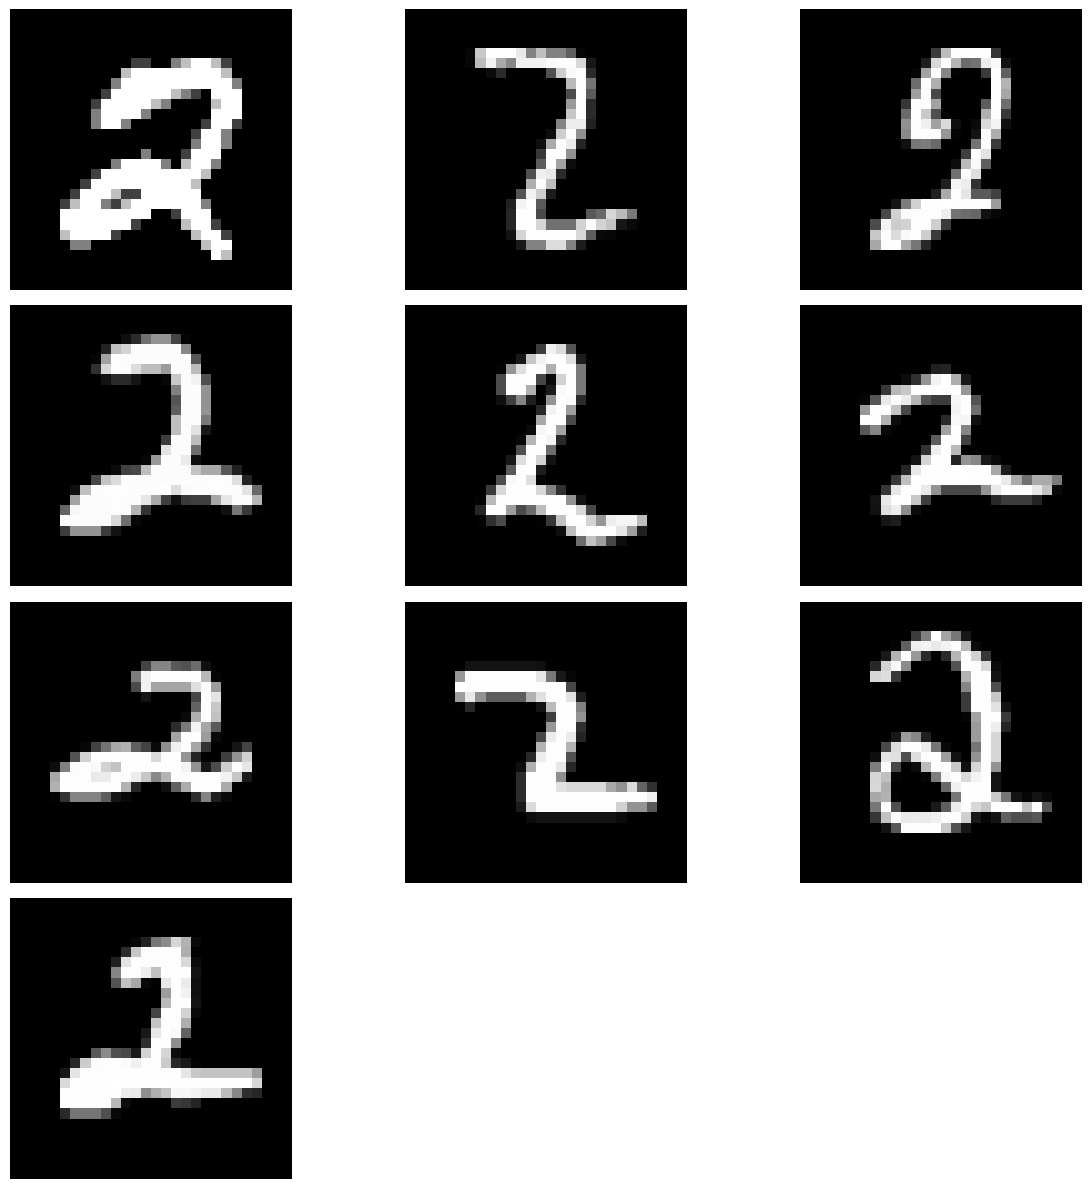

In [8]:
# Como minha imagem é da classe 2
# Vou pegar todas as imagens cujo label é 2
todos_2=X_tot[y_tot==2]


#teste de visualização
show_images(todos_2[:10], [""]*10)

In [9]:
# Calculando a quantidade de pixels claros em todas imagem 2
total_pixels_claros_em_2=np.sum((todos_2>128)&(todos_2<=pixel_mais_claro))

# Calculando a quantidade total de pixels em todas as imagens 2
total_pixels_2=todos_2.shape[0]*28*28

# Calculando a probabilidade de um pixel ser claro em todas as imagens 2
prob_pixel_claro_2=total_pixels_claros_em_2/total_pixels_2
prob_pixel_claro_2_str = f"{prob_pixel_claro_2*100:.2f}%"

print(f"A probabilidade de um pixel ser claro em todas as imagens da classe 2 é de {prob_pixel_claro_2_str}")

A probabilidade de um pixel ser claro em todas as imagens da classe 2 é de 14.90%


---

# 2️⃣ Tarefa 02: Análise Exploratória de Dados 📊

## ✨ Item a)

Conte quantas vezes cada dígito (de 0 a 9) aparece e responda:

1. Todos os dígitos aparecem a mesma quantidade?

2. Qual o valor médio dos píxeis de cada dígito?

In [10]:
y_tot

array([2, 4, 0, ..., 1, 0, 0], dtype=uint8)

In [11]:
# Questão 1


# for loop que vai de 0 a 9 para contar a quantidade de labels existentes para cada numero
for i in range(0,10):
    # qtd_i representa a quantidade de labels == i existentes
    qtd_i=np.sum(y_tot==i)
    print(f"Quantidade de imagens com label {i} = {qtd_i}")

Quantidade de imagens com label 0 = 5920
Quantidade de imagens com label 1 = 6725
Quantidade de imagens com label 2 = 6023
Quantidade de imagens com label 3 = 6107
Quantidade de imagens com label 4 = 5918
Quantidade de imagens com label 5 = 5376
Quantidade de imagens com label 6 = 5915
Quantidade de imagens com label 7 = 6238
Quantidade de imagens com label 8 = 5856
Quantidade de imagens com label 9 = 5922


In [12]:
# Questão 2


for i in range (0,10):
    # Armazenando as imagens cujo label é i
    imagens_i=X_tot[y_tot==i]

    # Calculando o valor médio dos pixels de cada dígifo
    media_i=np.mean(imagens_i)

    print(f"Média dos pixels do dígito {i} = {media_i:.2f}")

Média dos pixels do dígito 0 = 44.23
Média dos pixels do dígito 1 = 19.40
Média dos pixels do dígito 2 = 38.02
Média dos pixels do dígito 3 = 36.23
Média dos pixels do dígito 4 = 31.04
Média dos pixels do dígito 5 = 32.92
Média dos pixels do dígito 6 = 35.24
Média dos pixels do dígito 7 = 29.26
Média dos pixels do dígito 8 = 38.40
Média dos pixels do dígito 9 = 31.34


### Resposta 01: Não. Na nossa base temos quantidades diferentes de dígitos

### Resposta 02: 
    Média dos pixels do dígito 0 = 44.23
    Média dos pixels do dígito 1 = 19.40
    Média dos pixels do dígito 2 = 38.02
    Média dos pixels do dígito 3 = 36.23
    Média dos pixels do dígito 4 = 31.04
    Média dos pixels do dígito 5 = 32.92
    Média dos pixels do dígito 6 = 35.24
    Média dos pixels do dígito 7 = 29.26
    Média dos pixels do dígito 8 = 38.40
    Média dos pixels do dígito 9 = 31.34

### Resposta 03: ccccc

## 📏 Item b)

Faça um histograma que mostre a distribuição dos valores dos píxeis para cada dígito. Há muitos valores que são “apagados” (ou seja, com valor 0) ou a distribuição dos valores é mais equilibrada entre os dígitos?


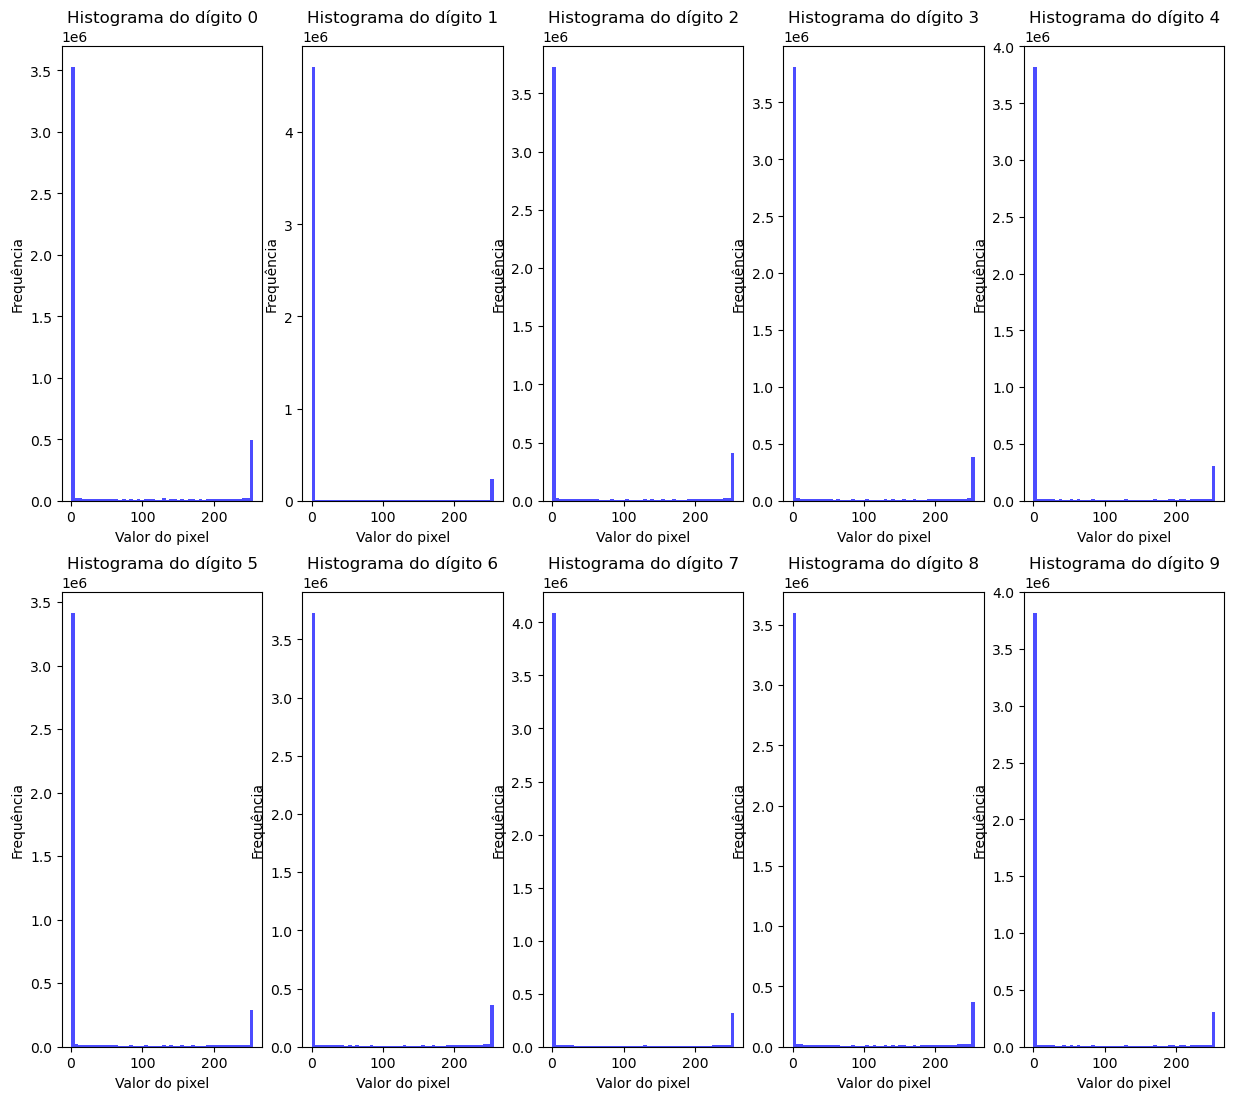

In [13]:
# Lista para armazenar os valores de todos os pixels de todos os dígitos
LISTA_ARMAZENAMENTO=[]

for i in range(0,10):
    # Armazenando as imagens cujo label é i
    imagens_i=X_tot[y_tot==i]

    # transformando a Matriz em lista contínua para facilitar as contas
    imagens_i_lista=imagens_i.flatten()
    
    # Adicionando a lista de pixels de cada dígito à lista de armazenamento
    LISTA_ARMAZENAMENTO.append(imagens_i_lista)



# Armazenando os labels de 0 a 9
LISTA_LABELS=[numero for numero in range(0,10)]


# criando um grid 2x5 para visualizar os histogramas
fig, axs = plt.subplots(2, 5, figsize=(15, 13))

# Loop para plotar os histogramas
# vou dividir em 2 loops para plotar os eixos x e y
for i in range(2):
    for j in range(5):
        # Plotando o histograma
        axs[i, j].hist(LISTA_ARMAZENAMENTO[i*5+j], bins=50, color='blue', alpha=0.7)
        axs[i, j].set_title(f"Histograma do dígito {LISTA_LABELS[i*5+j]}")
        axs[i, j].set_xlabel("Valor do pixel")
        axs[i, j].set_ylabel("Frequência")



In [14]:
# Calculando a porcentagem de pixels pretos para cada classe de digito

for i in range(0,10):
    # Calculando a quantidade de pixels pretos para cada classe de digito
    qtd_pixel_preto=np.sum(LISTA_ARMAZENAMENTO[i]==0)

    # Calculando a quantidade total de pixels para cada classe de digito
    qtd_total_pixels=len(LISTA_ARMAZENAMENTO[i])

    # Calculando a porcentagem de pixels pretos para cada classe de digito
    porcentagem_pixel_preto=qtd_pixel_preto/qtd_total_pixels
    porcentagem_pixel_preto_str = f"{porcentagem_pixel_preto*100:.2f}%"

    print(f"A porcentagem de pixels pretos para a classe de digito {i} é de {porcentagem_pixel_preto_str}")

A porcentagem de pixels pretos para a classe de digito 0 é de 75.52%
A porcentagem de pixels pretos para a classe de digito 1 é de 89.04%
A porcentagem de pixels pretos para a classe de digito 2 é de 78.47%
A porcentagem de pixels pretos para a classe de digito 3 é de 79.12%
A porcentagem de pixels pretos para a classe de digito 4 é de 81.88%
A porcentagem de pixels pretos para a classe de digito 5 é de 80.53%
A porcentagem de pixels pretos para a classe de digito 6 é de 79.87%
A porcentagem de pixels pretos para a classe de digito 7 é de 83.23%
A porcentagem de pixels pretos para a classe de digito 8 é de 77.84%
A porcentagem de pixels pretos para a classe de digito 9 é de 81.73%


Resposta: Existe uma porcentagem muito alta de pixels pretos nas imagens. Isso faz sentido, pois os pixels pretos seriam o background das imagens. Destaca-se a alta porcentagem de pixels pretos nas classes de dígito 1. Isso se deve pela "geometria" do dígito 1, que se assemelha a um traço e, portanto, gasta menos pixels brancos (ou claros) para desenhá-los.

## 🤓 Item c)

Crie uma imagem para cada dígito (de 0 a 9) em que cada píxel dessa nova imagem representa a média do valor dos píxeis para aquela classe. Você consegue reconhecer os dígitos nas imagens criadas?

In [15]:
# Minha ideia é fazer o seguinte:
# 1) Pegar todas as imagens da classe i
# 2) Para o primeiro pixel, calcular a média desse pixel considerando todos os primeiros pixels da imagem de classe i
# 3) Fazer o mesmo para o segundo pixel, terceiro pixel e assim por diante

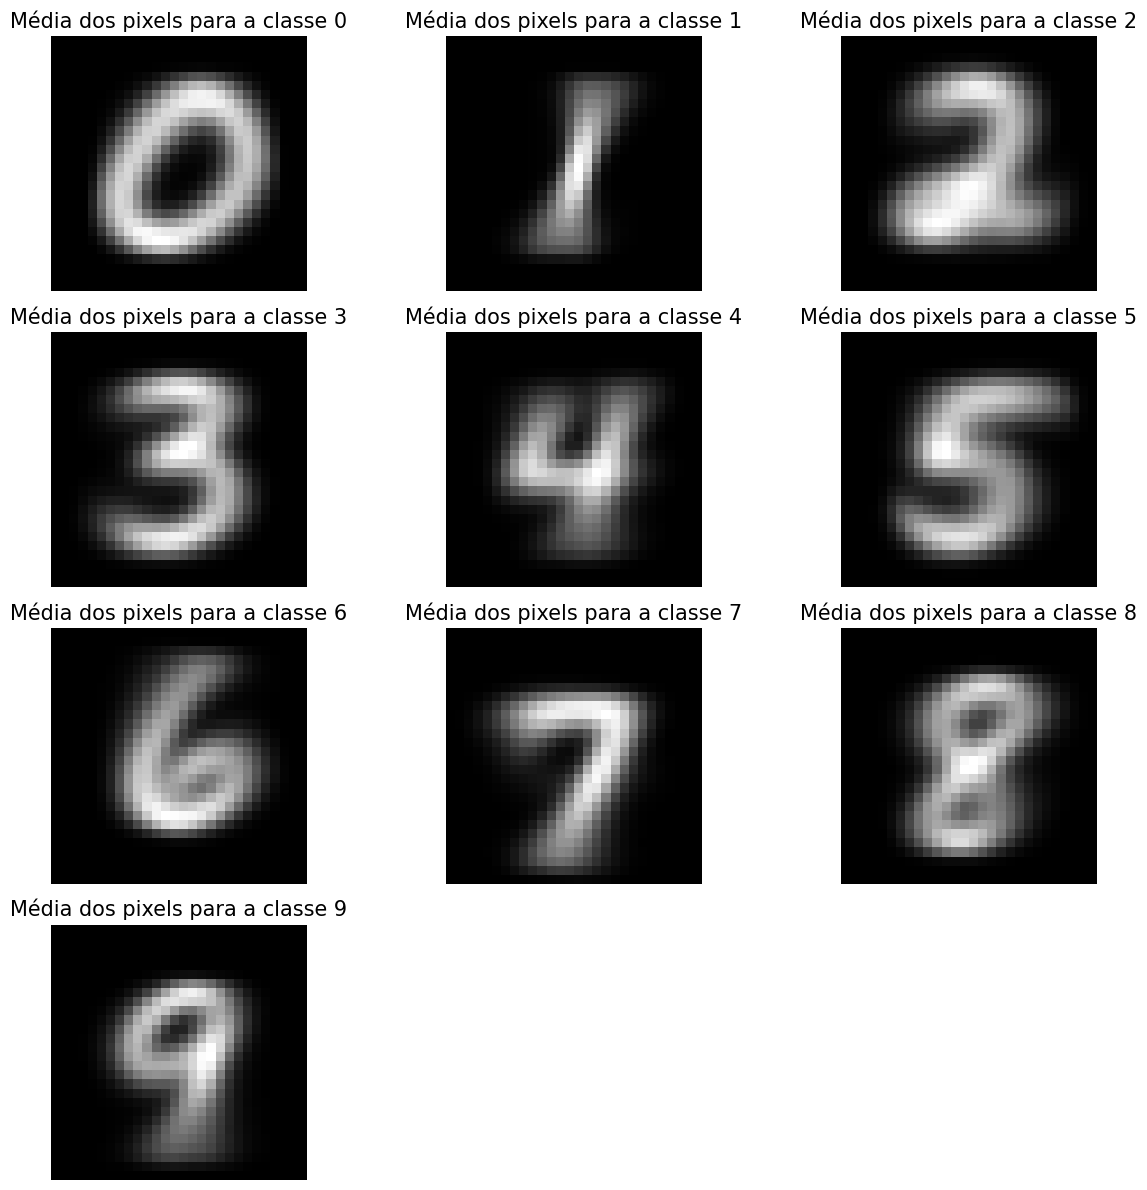

In [16]:
#Lista para armazenar as imagens sobrepostas dos digitos i
MEDIA_PIXELS_I=[]

for i in range(10):
    # Pegando todas as imagens da classe i
    imagens_i=X_tot[y_tot==i]

    # Calculando a média de cada pixel para a classe i
    media_pixels_i=np.mean(imagens_i, axis=0)

    MEDIA_PIXELS_I.append(media_pixels_i)



# For loop para criar os títulos


TITULO=[]
for i in range(10):
    # Título para a imagem da média dos pixels
    titulo=f"Média dos pixels para a classe {i}"
    TITULO.append(titulo)



# Plotando a imagem da média dos pixels
show_images(MEDIA_PIXELS_I,TITULO )

Resposta: É possível identificar os números, apesar de ficarem um pouco borrados por ser uma média de todas as imagens nítdas.

---

# 3️⃣ Tarefa 03: Treinamento e Teste de Modelos 🤖

## 📈 Item a)

Treine a ANN1 com 784 entradas, 8 neurônios na 1⁠ª camada oculta, 8 neurônios na 2⁠ª camada oculta e 10 saídas. Utilize 5 épocas para o treinamento. Use a biblioteca `scikit-learn`:

- Input Layer: 784 entradas (28x28);
- Hidden Layer 1: 8 neurônios;
- Hidden Layer 2: 8 neurônios;
- Output Layer: 10 saídas; (Classificador 0-9)
- Treine com 10 épocas.

In [17]:


# Dividir os dados em conjuntos de treino e teste
""" Aqui dei um reshape normalmente e dividi por 225, para noemalizar de 0 a 1 a claridade dos pixels
sem isso, a precisão do meu modelo caia bastante """
X_train, X_test, y_train, y_test = train_test_split(X_tot.reshape(-1,28*28)/255, y_tot, test_size=0.3, random_state=42)






In [18]:
# Criar o classificador MLP com as especificações fornecidas
mlp_ann1 = MLPClassifier(hidden_layer_sizes=(8, 8), max_iter=10, random_state=42)

# Treinar o classificador
mlp_ann1.fit(X_train, y_train)

c:\Users\monon\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(8, 8), max_iter=10, random_state=42)

In [19]:
# Fazer previsões no conjunto de teste
y_pred = mlp_ann1.predict(X_test)


# Calcular a acurácia no conjunto de treino

precisao_treino_1=accuracy_score(y_train, mlp_ann1.predict(X_train))
print(f"Acurácia no conjunto de treino: {precisao_treino_1:.4f}")



# Calcular a acurácia no conjunto de teste
precisao_teste_1 = accuracy_score(y_test, y_pred)
print(f"Acurácia no conjunto de teste: {precisao_teste_1:.4f}")


# Gerando o relatório como dicionário
tabela_precisao = classification_report(y_test, y_pred, output_dict=True)

#Aqui eu transformei o dicionário em um dataframe para melhor visualização. O .T é apenas para transpor a tabela
df_tabela1=pd.DataFrame(tabela_precisao).T
display(df_tabela1)




Acurácia no conjunto de treino: 0.9143
Acurácia no conjunto de teste: 0.9077


,precision,recall,f1-score,support
0,0.958147,0.959218,0.958682,1790.000000
1,0.943369,0.953056,0.948188,2045.000000
2,0.930687,0.864612,0.896434,1817.000000
3,0.907289,0.854945,0.880339,1820.000000
4,0.918344,0.906356,0.912311,1762.000000
5,0.855911,0.866044,0.860948,1605.000000
6,0.934270,0.948659,0.941410,1753.000000
7,0.912978,0.934122,0.923429,1943.000000
8,0.854143,0.877040,0.865440,1716.000000
9,0.853738,0.901086,0.876773,1749.000000


## 📉 Item b)

Treine a ANN2 com 784 entradas, 256 neurônios na 1⁠ª camada oculta, 256 neurônios na 2⁠ª camada oculta, 256 neurônios na 3ª camada oculta, 256 neurônios na 4ª camada oculta e 10 saídas. Utilize 20 épocas dessa vez. Use a biblioteca `scikit-learn`.

- Input Layer: 784 entradas (28x28);
- Hidden Layer 1: 256 neurônios;
- Hidden Layer 2: 256 neurônios;
- Hidden Layer 3: 256 neurônios;
- Hidden Layer 4: 256 neurônios;
- Output Layer: 10 saídas; (Classificação 0-9)
- Treine com 20 épocas.

In [20]:
# Criar o classificador MLP com as especificações fornecidas
mlp_ann2 = MLPClassifier(hidden_layer_sizes=(256, 256, 256, 256), max_iter=20, random_state=42)

# Treinar o classificador
mlp_ann2.fit(X_train, y_train)


c:\Users\monon\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(256, 256, 256, 256), max_iter=20,
              random_state=42)

In [21]:

# Fazer previsões no conjunto de teste
y_pred_ann2 = mlp_ann2.predict(X_test)

# Calcular a acurácia no conjunto de treino
precisao_treino_2 = accuracy_score(y_train, mlp_ann2.predict(X_train))
print(f"Acurácia no conjunto de treino: {precisao_treino_2:.4f}")

# Calcular a acurácia no conjunto de teste
precisao_teste_2 = accuracy_score(y_test, y_pred_ann2)
print(f"Acurácia no conjunto de teste: {precisao_teste_2:.4f}")

# Gerando o relatório
tabela_precisao_ann2 = classification_report(y_test, y_pred_ann2, output_dict=True)

# Transformando o dicionário em um dataframe para melhor visualização
df_tabela2 = pd.DataFrame(tabela_precisao_ann2).T
display(df_tabela2)

Acurácia no conjunto de treino: 0.9954
Acurácia no conjunto de teste: 0.9743


,precision,recall,f1-score,support
0,0.985393,0.979888,0.982633,1790.000000
1,0.975985,0.993643,0.984735,2045.000000
2,0.958266,0.985691,0.971785,1817.000000
3,0.963043,0.973626,0.968306,1820.000000
4,0.976705,0.975596,0.976150,1762.000000
5,0.984556,0.953271,0.968661,1605.000000
6,0.978507,0.986880,0.982675,1753.000000
7,0.971297,0.975296,0.973292,1943.000000
8,0.983557,0.941142,0.961882,1716.000000
9,0.969213,0.971984,0.970597,1749.000000


Nota: Acho que nunca cheguei em um modelo tão preciso. Na base de teste ok, posso ter um problema de overfitting. Acredito que terei mais informações quando usar a base de validação e colocar no Kaggle

## ⚙️ Item c)

Agora você treinará um novo modelo, mais adequado. Para isso, gere ao menos 5 configurações de redes neurais, variando o número de camadas ocultas, o número de neurônios e o número de épocas. As configurações devem estar intermediárias entre `[8, 8]` e `[256, 256, 256, 256]`.

Utilize a função `GridSearchCV` para realizar uma busca exaustiva pelos hiperparâmetros e encontre a configuração que oferece o melhor classificador, justificando sua escolha com base nas métricas de validação.

In [22]:

# Definição de alguns parametros que o GridSearch vai testar
param_grid = {
    'hidden_layer_sizes': [
        (128,128),
        (64, 64,64),
        (256, 256, 256, 256)
    ],
    'max_iter': [10,30]  #epocas
}


# Criando o modelo
mlp_ann3 = MLPClassifier(random_state=42)

# Colocando os parametros no grid search
grid_search = GridSearchCV(estimator=mlp_ann3, param_grid=param_grid, cv=3,scoring='accuracy', verbose=2)


# Aplicando o grid no nosso modelo
grid_search.fit(X_train, y_train)

# Melhores parâmetros :)
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

print(f"Best parameters found: {best_params}")
print(f"Best estimator: {best_estimator}")



Fitting 3 folds for each of 6 candidates, totalling 18 fits


c:\Users\monon\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END .........hidden_layer_sizes=(128, 128), max_iter=10; total time=   7.2s


c:\Users\monon\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END .........hidden_layer_sizes=(128, 128), max_iter=10; total time=   8.6s


c:\Users\monon\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END .........hidden_layer_sizes=(128, 128), max_iter=10; total time=   8.0s


c:\Users\monon\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END .........hidden_layer_sizes=(128, 128), max_iter=30; total time=  20.5s


c:\Users\monon\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END .........hidden_layer_sizes=(128, 128), max_iter=30; total time=  20.3s


c:\Users\monon\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END .........hidden_layer_sizes=(128, 128), max_iter=30; total time=  20.4s


c:\Users\monon\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END .......hidden_layer_sizes=(64, 64, 64), max_iter=10; total time=   4.1s


c:\Users\monon\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END .......hidden_layer_sizes=(64, 64, 64), max_iter=10; total time=   4.1s


c:\Users\monon\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END .......hidden_layer_sizes=(64, 64, 64), max_iter=10; total time=   4.0s


c:\Users\monon\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END .......hidden_layer_sizes=(64, 64, 64), max_iter=30; total time=  11.7s


c:\Users\monon\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END .......hidden_layer_sizes=(64, 64, 64), max_iter=30; total time=  11.7s


c:\Users\monon\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END .......hidden_layer_sizes=(64, 64, 64), max_iter=30; total time=  11.8s


c:\Users\monon\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END hidden_layer_sizes=(256, 256, 256, 256), max_iter=10; total time=  29.1s


c:\Users\monon\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END hidden_layer_sizes=(256, 256, 256, 256), max_iter=10; total time=  30.1s


c:\Users\monon\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END hidden_layer_sizes=(256, 256, 256, 256), max_iter=10; total time=  29.3s


c:\Users\monon\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END hidden_layer_sizes=(256, 256, 256, 256), max_iter=30; total time= 1.4min


c:\Users\monon\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END hidden_layer_sizes=(256, 256, 256, 256), max_iter=30; total time= 1.5min
[CV] END hidden_layer_sizes=(256, 256, 256, 256), max_iter=30; total time= 1.3min
Best parameters found: {'hidden_layer_sizes': (256, 256, 256, 256), 'max_iter': 30}
Best estimator: MLPClassifier(hidden_layer_sizes=(256, 256, 256, 256), max_iter=30,
              random_state=42)


(No meu notebook, o código demorou 9min 22s para rodar)

In [23]:
# Aplicando o melhor modelo no conjunto de teste
y_pred_best = best_estimator.predict(X_test)
precisao_teste_3 = accuracy_score(y_test, y_pred_best)
precisao_treino_3 = accuracy_score(y_train, best_estimator.predict(X_train))

print(f"Acurácia no conjunto de treino (após gridsearch): {precisao_treino_3:.3f}")
print(f"Acurácia no conjunto de teste (após gridsearch): {precisao_teste_3:.3f}")

# Gerando o relatório de classificação
classification_report_best = classification_report(y_test, y_pred_best, output_dict=True)
df_tabela3 = pd.DataFrame(classification_report_best).T
display(df_tabela3)

Acurácia no conjunto de treino (após gridsearch): 0.997
Acurácia no conjunto de teste (após gridsearch): 0.978


,precision,recall,f1-score,support
0,0.993243,0.985475,0.989344,1790.000000
1,0.988770,0.990220,0.989494,2045.000000
2,0.981298,0.981838,0.981568,1817.000000
3,0.964033,0.971978,0.967989,1820.000000
4,0.987254,0.967083,0.977064,1762.000000
5,0.960952,0.981308,0.971023,1605.000000
6,0.969291,0.990302,0.979684,1753.000000
7,0.985036,0.982501,0.983767,1943.000000
8,0.986544,0.939977,0.962698,1716.000000
9,0.957637,0.982276,0.969800,1749.000000


## 🔧 Item d)

Para os modelos treinados nas questões a) e b), além do classificador encontrado na questão c), compare o desempenho dos modelos, analisando se apresentam *underfitting* ou *overfitting*. Justifique com gráficos e análises.


In [24]:
mlp_ann1

MLPClassifier(hidden_layer_sizes=(8, 8), max_iter=10, random_state=42)

In [25]:
print(precisao_teste_1)

0.9077222222222222


In [26]:
mlp_ann2

MLPClassifier(hidden_layer_sizes=(256, 256, 256, 256), max_iter=20,
              random_state=42)

In [27]:
print(precisao_teste_2)

0.9743333333333334


In [28]:
mlp_ann3

MLPClassifier(random_state=42)

In [29]:
best_estimator

MLPClassifier(hidden_layer_sizes=(256, 256, 256, 256), max_iter=30,
              random_state=42)

In [30]:
print(precisao_teste_3)

0.9776111111111111


In [31]:
print(best_params)

{'hidden_layer_sizes': (256, 256, 256, 256), 'max_iter': 30}


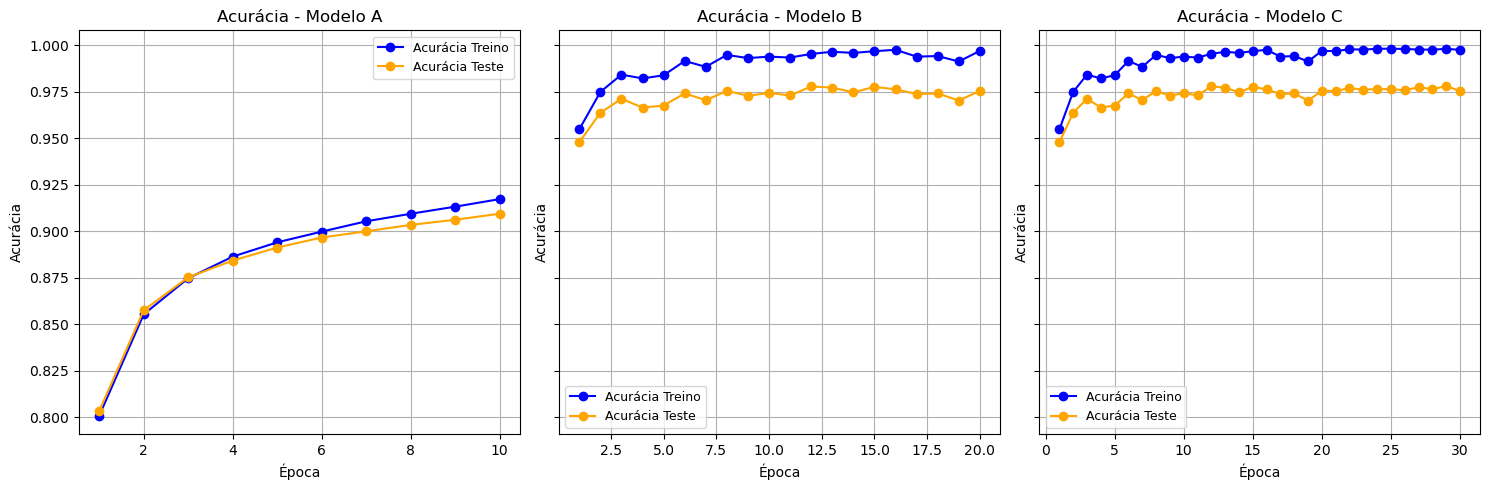

In [32]:
# Função para plotar gráficos comparativos de acurácia
def grafico_acuracia_comparativo(models, X_train, y_train, X_test, y_test):

    classes = np.unique(y_train)  # Obter classes únicas
    fig, axes = plt.subplots(1, len(models), figsize=(5 * len(models), 5), sharey=True)  # Subplots dinâmicos

    for i, (titulo, layers, epochs) in enumerate(models):
        train_accuracy = []
        test_accuracy = []

        # Configurar o modelo
        ANN = MLPClassifier(hidden_layer_sizes=layers, max_iter=1, warm_start=True, random_state=42)

        # Treinamento por épocas
        for epoch in range(epochs):
            ANN.partial_fit(X_train, y_train, classes=classes)
            
            # Avaliar desempenho
            train_accuracy.append(accuracy_score(y_train, ANN.predict(X_train)))
            test_accuracy.append(accuracy_score(y_test, ANN.predict(X_test)))

        # Subplot correspondente
        axes[i].plot(range(1, epochs + 1), train_accuracy, marker='o', label='Acurácia Treino', color='blue')
        axes[i].plot(range(1, epochs + 1), test_accuracy, marker='o', label='Acurácia Teste', color='orange')
        axes[i].set_title(f"Acurácia - {titulo}", fontsize=12)
        axes[i].set_xlabel('Época', fontsize=10)
        axes[i].set_ylabel('Acurácia', fontsize=10)
        axes[i].legend(fontsize=9)
        axes[i].grid(True)

    plt.tight_layout()
    plt.show()

# Definir configurações dos modelos
models = [
    ('Modelo A', (8, 8), 10),
    ('Modelo B', (256, 256, 256, 256), 20),
    ('Modelo C', (256, 256,256,256), 30)
]

# Chamar a função para plotar
grafico_acuracia_comparativo(models, X_train, y_train, X_test, y_test)


Resposta:

Modelo 1: Possui uma precisão menor que os outros dois modelos. Isso pode ser observado pela acurácia menor (a maior precisão não passa de 92.5%). Entretanto, percebe-se um overfitting muito menor, ou seja, a performance do modelo na base de treino é muito semelhante à performance do modelo na base de teste.

Modelo 2: Percebemos que o aumento da quantidade de neurônios em cada camada de fato aumentou a precisão do modelo tanto na base de treino quanto na base de teste. Entretanto, percebemos que a diferentça de performance na base de treino e na base de teste aumentou, podendo indicar um overfitting. 

Modelo 3: Esse modelo é muito semelhante ao modelo 2, então era de se esperar que houvesse uma performance parecida. O único fator que muda foi a quantidade de épocas implementadas. Percebemos que - apesar de ter uma percentual na precisão -, os outros fatores não se alteram tanto. O modelo tende a se estabilizar (atinge o platô) após 10 epoch e tem uma precisão semelhante. Nesse sentido, cabe ponderar se a melhora na precisão de fato vale o gasto computacional e temporal de se usar 30 epocas ao invés de 20.


---

# 4️⃣ Tarefa 04: Resultados e Visualizações 🤞🏻

## 🐳 Item a)

Gere e apresente uma matriz de confusão que mostre a distribuição das previsões do melhor modelo. Quais as métricas de Acurácia, Precisão, Recall e F1-Score para esse modelo?

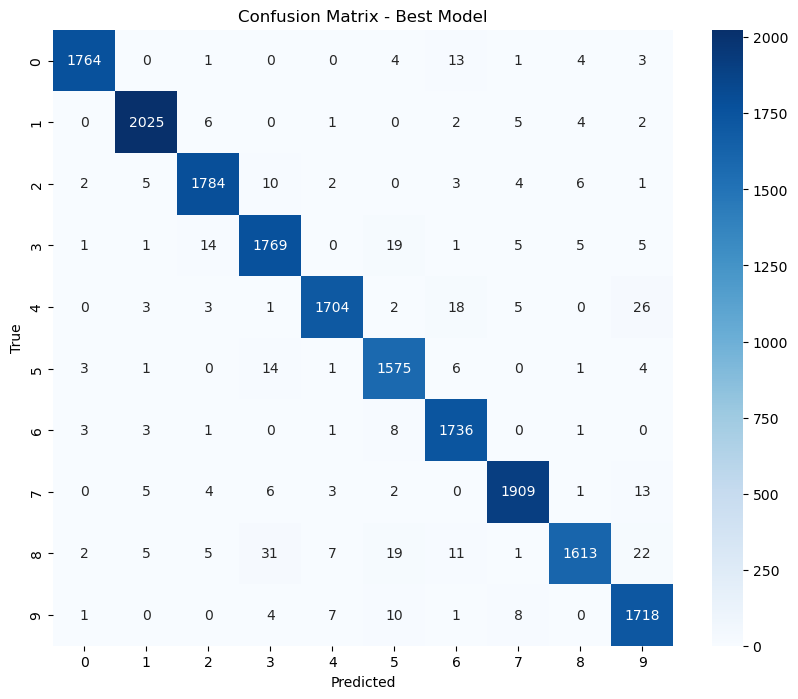

In [33]:


# Gerar a matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred_best)

# Plotar a matriz de confusão
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=LISTA_LABELS, yticklabels=LISTA_LABELS)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Best Model')
plt.show()



Percebemos que o modelo de fato tem uma precisão bem alta, classificando corretamente as imagens de acordo com os seus respectivoos labels. 

Percebe-se algumas classificações errôneas, como é o caso do predicted = 6 e true label = 0. Uma teoria é que os manusccritos têm um desenho semelhantes, o que pode levar a uma classificação errada.

O modelo também erra em diferenciar o "3" do "8". Podemos atribuir isso à geometria do desenho "na parte direita", que é igual para ambos os casos.

O "4" e "9" também gera problemas por conta da forma dos dois dígitos, que tende a ser semelhante.

Em suma, o modelo tende a confundir casos em que os desenhos dos dígitos são parecidos.

In [41]:
# Exibir as métricas de Acurácia, Precisão, Recall e F1-Score
print("Métricas do Melhor Modelo:")
print(f"Acurácia: {classification_report_best['accuracy']:.4f}")
print(f"Precisão Média: {classification_report_best['macro avg']['precision']:.4f}")
print(f"Recall Médio: {classification_report_best['macro avg']['recall']:.4f}")
print(f"F1-Score Médio: {classification_report_best['macro avg']['f1-score']:.4f}")

Métricas do Melhor Modelo:
Acurácia: 0.9776
Precisão Média: 0.9774
Recall Médio: 0.9773
F1-Score Médio: 0.9772


## 🐸 Item b)

Exiba gráficos que mostram a evolução da acurácia e da perda (`Loss`) durante o treinamento do melhor modelo encontrado no item 3c).

treinando novamente o modelo para armazenar as informações desejadas (não tinha armazenado de forma global as informações usadas nos gráficos de acurácia)

In [35]:
# Configuração do modelo
best_estimator = MLPClassifier(
    hidden_layer_sizes=(256, 256, 256, 256),  # Camadas ocultas
    max_iter=1,  # Configurado para 1 iteração por vez
    warm_start=True,  # Para continuar o treinamento
    random_state=42  # Reprodutibilidade
)

# Variáveis para armazenar os resultados
train_loss = []
train_accuracy = []

# Obter classes únicas para o treinamento
classes = np.unique(y_train)

# Treinamento por épocas
for epoch in range(30):  # Número total de épocas
    # Treinar o modelo (uma iteração por vez)
    best_estimator.partial_fit(X_train, y_train, classes=classes)
    
    # Armazenar a perda (loss) após a época
    train_loss.append(best_estimator.loss_)
    
    # Avaliar e armazenar a acurácia no conjunto de treinamento
    train_accuracy.append(accuracy_score(y_train, best_estimator.predict(X_train)))

    print(f"Época {epoch + 1}/{30} - Loss: {train_loss[-1]:.4f}, Acurácia Treino: {train_accuracy[-1]:.4f}")

Época 1/30 - Loss: 0.3345, Acurácia Treino: 0.9547
Época 2/30 - Loss: 0.1188, Acurácia Treino: 0.9749
Época 3/30 - Loss: 0.0780, Acurácia Treino: 0.9842
Época 4/30 - Loss: 0.0592, Acurácia Treino: 0.9821
Época 5/30 - Loss: 0.0471, Acurácia Treino: 0.9838
Época 6/30 - Loss: 0.0333, Acurácia Treino: 0.9915
Época 7/30 - Loss: 0.0284, Acurácia Treino: 0.9884
Época 8/30 - Loss: 0.0265, Acurácia Treino: 0.9948
Época 9/30 - Loss: 0.0240, Acurácia Treino: 0.9931
Época 10/30 - Loss: 0.0165, Acurácia Treino: 0.9939
Época 11/30 - Loss: 0.0208, Acurácia Treino: 0.9934
Época 12/30 - Loss: 0.0223, Acurácia Treino: 0.9953
Época 13/30 - Loss: 0.0165, Acurácia Treino: 0.9965
Época 14/30 - Loss: 0.0108, Acurácia Treino: 0.9959
Época 15/30 - Loss: 0.0146, Acurácia Treino: 0.9968
Época 16/30 - Loss: 0.0123, Acurácia Treino: 0.9975
Época 17/30 - Loss: 0.0112, Acurácia Treino: 0.9939
Época 18/30 - Loss: 0.0105, Acurácia Treino: 0.9942
Época 19/30 - Loss: 0.0120, Acurácia Treino: 0.9912
Época 20/30 - Loss: 0

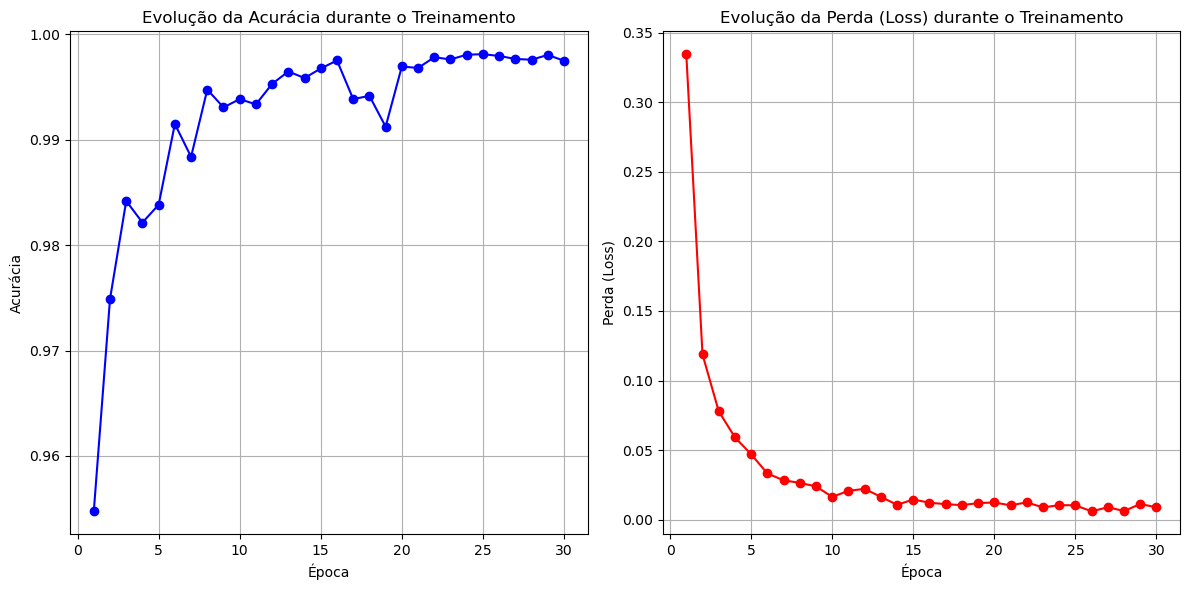

In [36]:
# Plotar a evolução da acurácia durante o treinamento
plt.figure(figsize=(12, 6))

# Gráfico da acurácia
plt.subplot(1, 2, 1)
plt.plot(range(1, len(train_accuracy) + 1), train_accuracy, marker='o', color='blue')
plt.title('Evolução da Acurácia durante o Treinamento')
plt.xlabel('Época')
plt.ylabel('Acurácia')
plt.grid(True)

# Gráfico da perda (Loss)
plt.subplot(1, 2, 2)
plt.plot(range(1, len(train_loss) + 1), train_loss, marker='o', color='red')
plt.title('Evolução da Perda (Loss) durante o Treinamento')
plt.xlabel('Época')
plt.ylabel('Perda (Loss)')
plt.grid(True)

plt.tight_layout()
plt.show()

Em ambos casos, tendemos a um platô nos gráficos. Um fator interessante, entretanto, foi a queda na acurácia entre a época 15 e 20. Podemos interpretar isso de diversas formas. Uma justificativa pode ser uma mudança temporária nos pesos do modelo. Durante o treinamento, o otimizador faz ajustes nos pesos com base no gradiente. Em alguns momentos, esses ajustes podem ser desbalanceados, levando a uma ligeira queda no desempenho. Como o modelo volta à tendência de platô, podemos interpretar isso como um processo normal na aprendizagem do modelo

## 🦖 Item c)

Escolha algumas imagens do conjunto de teste e mostre previsões do seu modelo, com acertos e erros. Discuta quais fatores podem ter contribuído para essas previsões corretas e incorretas.

Previsões corretas

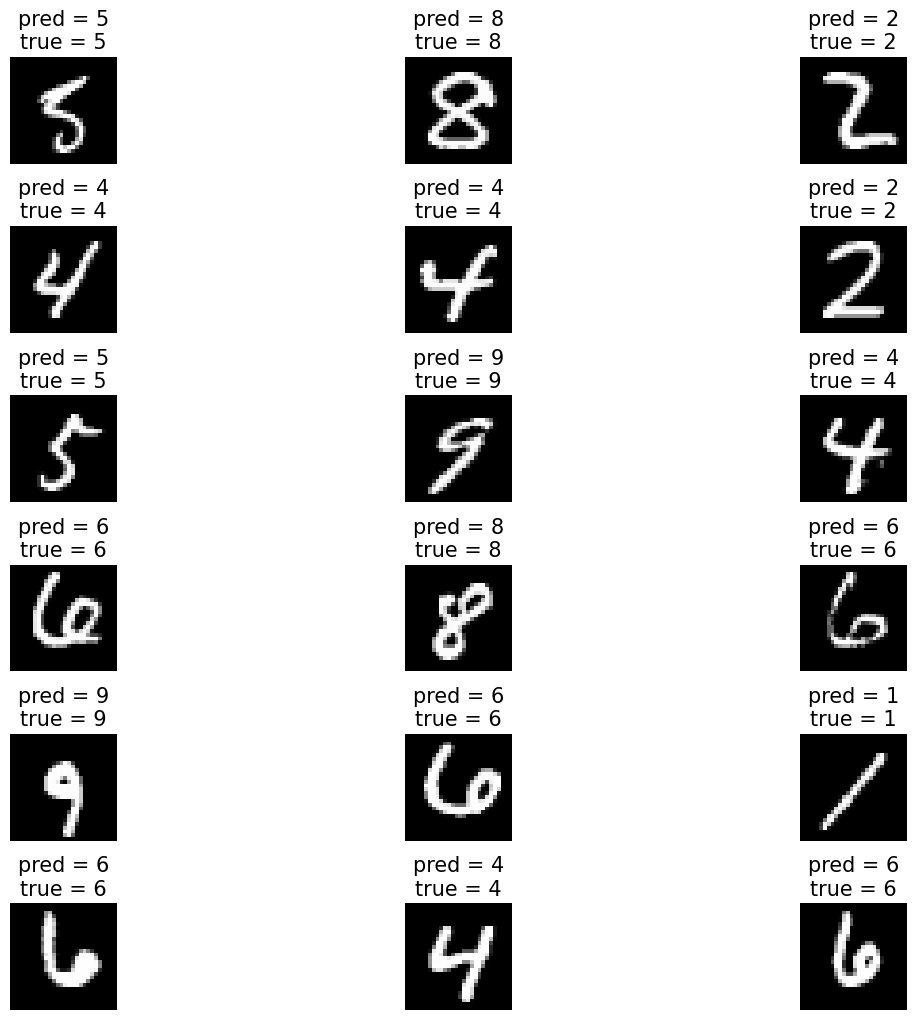

In [37]:
# Reshape X_test para 28x28
X_test_reshaped = X_test.reshape(-1, 28, 28)

# Filtrar previsões corretas
X_right = X_test_reshaped[y_test == y_pred_best]
y_pred_right = y_pred_best[y_test == y_pred_best]
y_true_right = y_test[y_test == y_pred_best]

# Mostrar imagens corretas
show_images(X_right[:18], [f'pred = {y_pred_right[k]}\ntrue = {y_true_right[k]}' for k in range(18)])

Labels incorretos

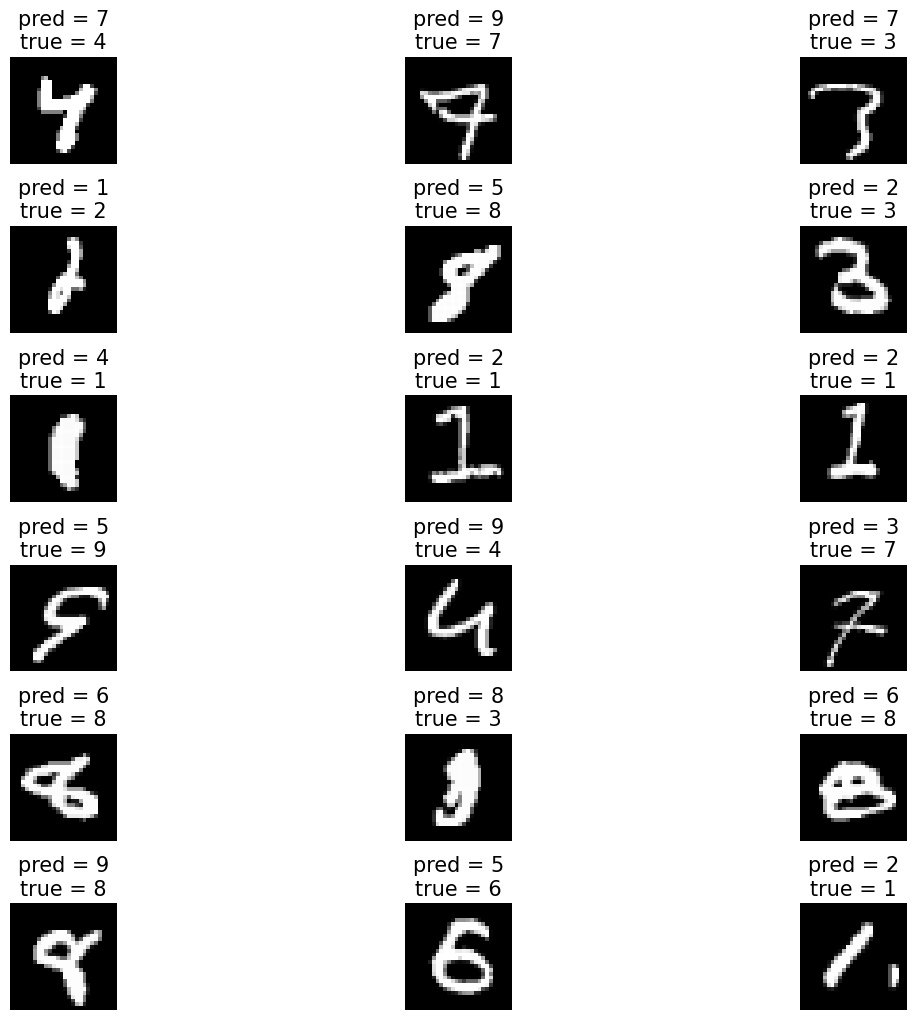

In [38]:
# Reshape X_test para 28x28
X_test_reshaped = X_test.reshape(-1, 28, 28)

# Filtrar previsões erradas
X_wrong = X_test_reshaped[y_test != y_pred_best]
y_pred_wrong = y_pred_best[y_test != y_pred_best]
y_true_wrong = y_test[y_test != y_pred_best]

# Mostrar imagens erradas
show_images(X_wrong[:18], [f'pred = {y_pred_wrong[k]}\ntrue = {y_true_wrong[k]}' for k in range(18)])

Percebe-se que de fato a maioria dos casos em que o modelo erra é devido ao fato que o desenho é bem mal feito. 

Existem alguns casos em que era possível identificar o numero, mas o modelo não conseguiu, como é o caso do 7 (linha 4, coluna 3) e o número 6 (linha 6, coluna 2). Conforme a teoria levantada no ítem 4a), a confusão do modelo é por conta das geometrias dos dígitos - que tendem a ser semelhantes. Entretanto, podemos observar que existe o fator "qualidade do manuscrito" em que um desenho mal feito acarreta em uma confusão do modelo (teoria que não tinha sido levantada anteriormente).

Atenção: Fica evidente que o modelo não aprendeu a diferenciar o numero 2 do nummero 1 (com uma barra na parte de baixo do desenho), como é o caso da linha 3 colunas 2 e 3.

---

Prevendo os valores para a base do Kaggle

In [39]:
kaggle = best_estimator.predict(X_val.reshape(-1,28 * 28) / 255)
df = pd.DataFrame({'ID': np.arange(1,10001), 'Answer':kaggle})
df.set_index('ID', inplace=True)
df.to_csv('PMR3508-2024-34.csv')
display(df)

,Answer
ID,
1,8
2,4
3,8
4,7
5,7
...,...
9996,2
9997,8
9998,3


---

# 5️⃣ Tarefa 05: Lembrete *Kaggle* e Documentação 🗃️

## 😮‍💨 Item a)

# Lembre-se de publicar no *Kaggle* com o título correto e padronizado!

## 🙏🏻 Item b)

# Lembre-se de documentar adequadamente seu código e conclusões!